In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
#1. Análisis estadístico de datos categóricos

#Se importa una tabla con resultados de ensayos de competencia por la colonización rizosférica con pooles de mutantes como inóculo
path = './tablas/competencia_pooles.csv'
competencia_df = pd.read_csv(path)
#Utilizando los valores M y p-value de cada firma se clasifica cada mutante como 'negativo' y 'no_negativo'
competencia_df['afectado'] = np.where((competencia_df['7dpiAlfL_KValor M']<-0.7) & (competencia_df['7dpiAlfL_HValor M']<-0.7) & (competencia_df['7dpiAlfL_Kt-test']<0.1) & (competencia_df['7dpiAlfL_Ht-test']<0.1), 'negativo', 'no_negativo')
display(competencia_df.head())

,mutant_ID,pool,firma,7dpiAlfL_KSUMA,7dpiAlfL_KValor M,7dpiAlfL_Kt-test,7dpiAlfL_HSUMA,7dpiAlfL_HValor M,7dpiAlfL_Ht-test,position,region,contig,Locus_tag,Gene,Protein,afectado
0,2011mTn5STM.1.01.A01,1.0,97.0,447.25,0.18,0.20,480.50,-0.04,0.59,NaN,NaN,NaN,NaN,NaN,NaN,no_negativo
1,2011mTn5STM.1.01.A03,1.0,3.0,258.75,0.02,0.91,0.25,-0.15,0.39,2193810.0,]--Intergenic--[,chromosome,SMc04206,SMc04206,hemolysin-type calcium-binding protein,no_negativo
2,2011mTn5STM.1.01.A04,1.0,4.0,440.00,0.19,0.62,375.00,0.32,0.48,53213.0,AE006469_51,pSymA,SMa0104,SMa0104,ABC transporter substrate-binding protein,no_negativo
3,2011mTn5STM.1.01.A05,1.0,5.0,463.00,-0.20,0.08,531.75,-0.35,0.01,3199830.0,SME591688_3013,chromosome,SMc03130,SMc03130,hypothetical protein,no_negativo
4,2011mTn5STM.1.01.A06,1.0,6.0,470.25,-0.34,0.09,687.00,-0.52,0.02,3426879.0,SME591688_3204,chromosome,SMc03762,SMc03762,hypothetical protein,no_negativo


/home/eze/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


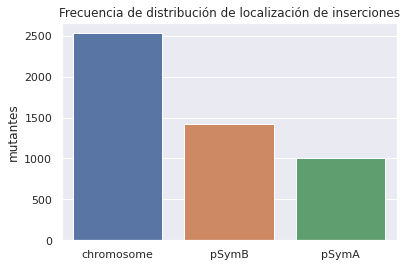

chromosome    2530
pSymB         1422
pSymA         1007
Name: contig, dtype: int64

In [3]:
#Se grafica en un histograma la frecuencia de distribución de localización de inserciones
contig_count = competencia_df['contig'].value_counts()
sns.set()
sns.barplot(contig_count.index, contig_count.values)
plt.title('Frecuencia de distribución de localización de inserciones')
plt.ylabel('mutantes', fontsize=12)
plt.savefig('./figuras/distribucion_inserciones_genoma.jpg')
plt.show()

display(contig_count)

/home/eze/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


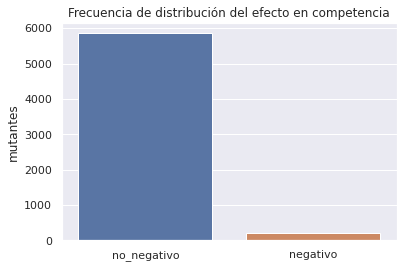

In [4]:
#Se grafica en un histograma la frecuencia de distribución del efecto de las mutaciones en competencia por la colonización rizosférica
afectado_count = competencia_df['afectado'].value_counts()
sns.set()
sns.barplot(afectado_count.index, afectado_count.values)
plt.title("Frecuencia de distribución del efecto en competencia")
plt.ylabel('mutantes', fontsize=12)
plt.savefig('./figuras/distribucion_mutantes_afectados_negativamente.jpg')
plt.show()

In [5]:
#Usando el test de Chi cuadrado se compara si la ubicación genómica de la mutación tiene relación con el efecto que podría generar
#se genera la tabla de contingencia para comparar mutantes afectados o no afectados y la ubición en el cromosoma o en cualquiera de los plásmidos
df2 = competencia_df['contig'] + competencia_df['afectado']

a = competencia_df['contig'] == 'chromosome'
b = competencia_df['afectado'] == 'negativo'

groups = df2.groupby([a,b]).count() 
print (groups)

#se realiza el test de chi cuadrado
print(ss.chisquare(groups, ddof=0, axis=0))

contig  afectado
False   False       2407
        True          22
True    False       2380
        True         150
dtype: int64
Power_divergenceResult(statistic=4301.76467029643, pvalue=0.0)


In [6]:
# y por último se compara entre los ubicados en el cromosoma y el plásmido pSymB
# la tabla competencia_df se filtra para descartar los mutantes en pSymA
competencia_df_plasmidos = competencia_df[(competencia_df['contig']=='chromosome') | (competencia_df['contig']=='pSymB')]

#se genera la talba de contingencia
df2 = competencia_df_plasmidos['contig'] + competencia_df_plasmidos['afectado']

a = competencia_df['contig'] == 'chromosome'
b = competencia_df['afectado'] == 'negativo'

groups = df2.groupby([a,b]).count() 
print (groups)

#se realiza el test de chi cuadrado
print(ss.chisquare(groups, ddof=0, axis=0))

contig  afectado
False   False       1403
        True          19
True    False       2380
        True         150
dtype: int64
Power_divergenceResult(statistic=3796.653846153846, pvalue=0.0)
